# Watching SGD in action with constant step sizes


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA

In [2]:
def compute_loss_avg(X, y, w):
    return (1/X.shape[0])*LA.norm(X@w - y, ord=2)**2

In [6]:
def SGD_update(X, y, w, eta):
    return w - (2.0 * eta/X.shape[0])*(X.transpose()@(X@w - y))

### Part (1). Under-parameterized ($n > d$) Noiseless ($\sigma=0$) Regime

#### Generate data

In [3]:
# Generate data
np.random.seed(0)

# Set number of samples
N = 2000
# Set the dimension
d = 200

# Generate data matrix X_train
X_train = np.random.randn(N, d)
# Generate ground truth w_star
w_star = np.random.randn(d, 1)

# Generate outputs y_train
y_train = X_train @ w_star
# Set mini batch size
batch_size = 64
# Set step size
eta = 0.01
# Set number of iterations
N_iteration = 10000

# Evaluate the largest and smallest eigenvalue
_, s, _ = np.linalg.svd(X_train/np.sqrt(N))
print('largest eigenvalue: ', s[0]**2)
print('smallest eigenvalue: ', s[-1]**2)

largest eigenvalue:  1.7095023515203154
smallest eigenvalue:  0.47581318789985916


In [4]:
BatchSizeList = [1, 64, 128]
EtaList = [0.005, 0.002, 0.001]

### Study the effect of step size $\eta$

In [7]:
w_init = (np.random.randn(d, 1)) * 0.0

Losses = []
batch_size = 64
for eta in EtaList:
    loss = []
    w = w_init.copy()
    for i in range(N_iteration):
        random_index = np.random.choice(N, batch_size)
        X_i = X_train[random_index, :]
        y_i = y_train[random_index]
        w = SGD_update(X_i, y_i, w, eta)
        loss.append(compute_loss_avg(X_train, y_train, w))
    Losses.append(loss)

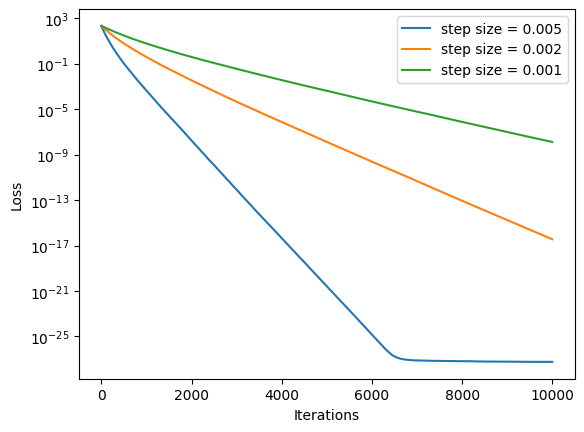

In [8]:
plt.figure()
idx = 0
for eta in EtaList:
    plt.semilogy(range(N_iteration), Losses[idx], label = 'step size = {}'.format(eta))
    idx += 1
plt.axis('tight')
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()

### Study the effect of mini batch size $|\mathcal{S}_{t}|$

In [9]:
w_init = (np.random.randn(d, 1)) * 0.0
Losses = []
eta = 0.001
for batch_size in BatchSizeList:
    loss = []
    w = w_init.copy()
    for i in range(N_iteration):
        random_index = np.random.choice(N, batch_size)
        X_i = X_train[random_index, :]
        y_i = y_train[random_index]
        w = SGD_update(X_i, y_i, w, eta)
        loss.append(compute_loss_avg(X_train, y_train, w))
    Losses.append(loss)

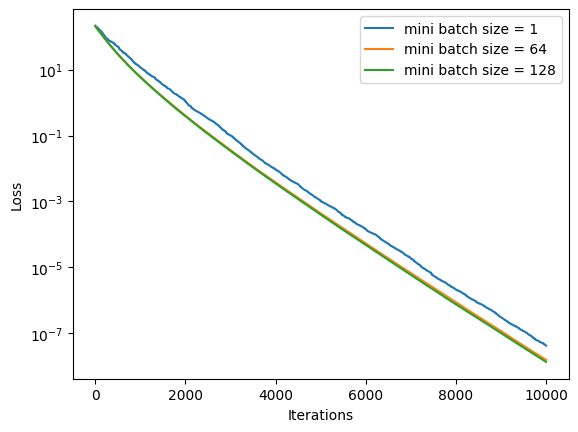

In [10]:
plt.figure()
idx = 0
for batch_size in BatchSizeList:
    plt.semilogy(range(N_iteration), Losses[idx], label = 'mini batch size = {}'.format(batch_size))
    idx += 1
plt.axis('tight')
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()

### Part (2). Over-parameterized ($n < d$) Noiseless ($\sigma=0$) Regime

#### Generate data

In [11]:
# Generate data
np.random.seed(0)

# Set number of samples
N = 500
# Set the dimension
d = 1000

# Generate data matrix X_train
X_train = np.random.randn(N, d)
# Generate ground truth w_star
w_star = np.random.randn(d, 1)

# Generate outputs y_train
y_train = X_train @ w_star
# Set mini batch size
batch_size = 64
# Set step size
eta = 0.001
# Set number of iterations
N_iteration = 50000


# Evaluate the largest and smallest eigenvalue
_, s, _ = np.linalg.svd(X_train/np.sqrt(N))
print('largest eigenvalue: ', s[0]**2)
print('smallest singular value (square): ', s[-1]**2)

largest eigenvalue:  5.771623003224577
smallest singular value (square):  0.17331335068830736


In [12]:
BatchSizeList = [1, 64, 128]
EtaList = [0.002, 0.001, 0.0005]

### Study the effect of step size $\eta$

In [14]:
w_init = (np.random.randn(d, 1)) * 0.0

Losses = []
batch_size = 64
for eta in EtaList:
    loss = []
    w = w_init.copy()
    for i in range(N_iteration):
        random_index = np.random.choice(N, batch_size)
        X_i = X_train[random_index, :]
        y_i = y_train[random_index]
        w = SGD_update(X_i, y_i, w, eta)
        loss.append(compute_loss_avg(X_train, y_train, w))
    Losses.append(loss)

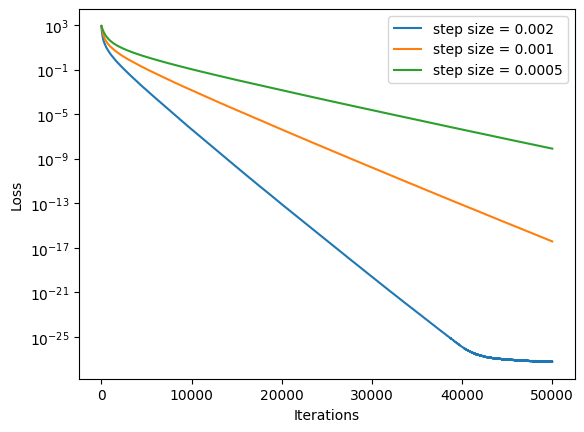

In [15]:
plt.figure()
idx = 0
for eta in EtaList:
    plt.semilogy(range(N_iteration), Losses[idx], label = 'step size = {}'.format(eta))
    idx += 1
plt.axis('tight')
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()

### Study the effect of mini batch size $|\mathcal{S}_{t}|$

In [16]:
w_init = (np.random.randn(d, 1)) * 0.0
Losses = []
eta = 0.0005
for batch_size in BatchSizeList:
    loss = []
    w = w_init.copy()
    for i in range(N_iteration):
        random_index = np.random.choice(N, batch_size)
        X_i = X_train[random_index, :]
        y_i = y_train[random_index]
        w = SGD_update(X_i, y_i, w, eta)
        loss.append(compute_loss_avg(X_train, y_train, w))
    Losses.append(loss)


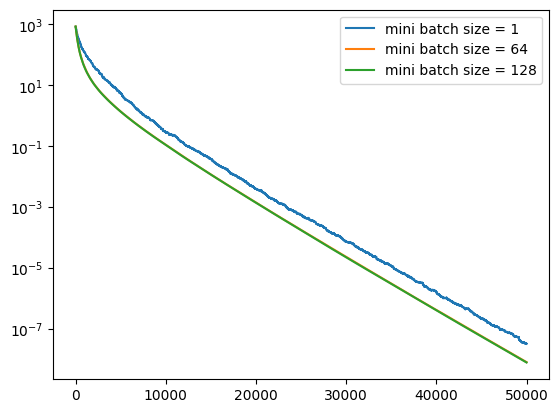

In [17]:
plt.figure()
idx = 0
for batch_size in BatchSizeList:
    plt.semilogy(range(N_iteration), Losses[idx], label = 'mini batch size = {}'.format(batch_size))
    idx += 1
plt.axis('tight')
plt.legend()
plt.show()

### Part (3). Over-parameterized ($n < d$) Noise ($\sigma>0$) Regime

#### Generate data

In [18]:
# Generate data
np.random.seed(0)

# Set number of samples
N = 500
# Set the dimension
d = 1000

# Generate data matrix X_train
X_train = np.random.randn(N, d)
# Generate ground truth w_star
w_star = np.random.randn(d, 1)

# Generate outputs y_train
y_train = X_train @ w_star + 0.1 * np.random.randn(N, 1)
# Set mini batch size
batch_size = 64
# Set step size
eta = 0.001
# Set number of iterations
N_iteration = 50000


# Evaluate the largest and smallest eigenvalue
X_train = np.concatenate((X_train, 0.1 * np.eye(N)), axis=1)
_, s, _ = np.linalg.svd(X_train/np.sqrt(N))
print('largest eigenvalue: ', s[0]**2)
print('smallest singular value (square): ', s[-1]**2)

largest eigenvalue:  5.77164300322458
smallest singular value (square):  0.17333335068830757


#### Study the effect of step size $\eta$

In [19]:
w_init = (np.random.randn(d + N, 1)) * 0.0

Losses = []
batch_size = 64
for eta in EtaList:
    loss = []
    w = w_init.copy()
    for i in range(N_iteration):
        random_index = np.random.choice(N, batch_size)
        X_i = X_train[random_index, :]
        y_i = y_train[random_index]
        w = SGD_update(X_i, y_i, w, eta)
        loss.append(compute_loss_avg(X_train, y_train, w))
    Losses.append(loss)

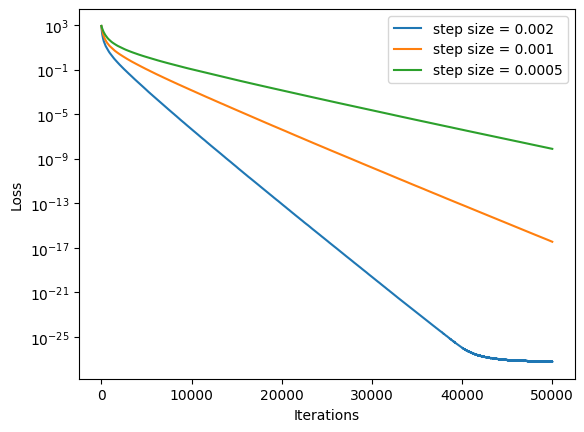

In [20]:
plt.figure()
idx = 0
for eta in EtaList:
    plt.semilogy(range(N_iteration), Losses[idx], label = 'step size = {}'.format(eta))
    idx += 1
plt.axis('tight')
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()

#### Study the effect of mini batch size $|\mathcal{S}_{t}|$

In [21]:
w_init = (np.random.randn(d + N, 1)) * 0.0
Losses = []
eta = 0.0005
for batch_size in BatchSizeList:
    loss = []
    w = w_init.copy()
    for i in range(N_iteration):
        random_index = np.random.choice(N, batch_size)
        X_i = X_train[random_index, :]
        y_i = y_train[random_index]
        w = SGD_update(X_i, y_i, w, eta)
        loss.append(compute_loss_avg(X_train, y_train, w))
    Losses.append(loss)

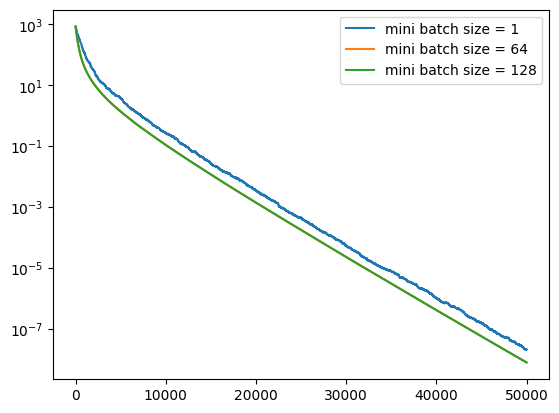

In [22]:
plt.figure()
idx = 0
for batch_size in BatchSizeList:
    plt.semilogy(range(N_iteration), Losses[idx], label = 'mini batch size = {}'.format(batch_size))
    idx += 1
plt.axis('tight')
plt.legend()
plt.show()

### Part (4). Under-parameterized ($n > d$) Noise ($\sigma>0$) Regime

#### Compare SGD on original ridge regression and feature-augmented regression

In [23]:
# Generate data
np.random.seed(0)

# Set number of samples
N = 500
# Set the dimension
d = 50

# Generate data matrix X_train
X_train = np.random.randn(N, d)
# Generate ground truth w_star
w_star = np.random.randn(d, 1)

# Generate outputs y_train
y_train = X_train @ w_star + 0.1 * np.random.randn(N, 1)
y_train_clean = X_train @ w_star
# Set mini batch size
batch_size = 64
# Set step size
eta = 0.001
# Set number of iterations
N_iteration = 500000


alpha = 0.01

w_star = np.linalg.inv(X_train.transpose()@X_train + N * alpha * np.eye(d))@X_train.transpose()@y_train
w_star_clean = np.linalg.inv(X_train.transpose()@X_train)@X_train.transpose()@y_train_clean


# Evaluate the largest and smallest eigenvalue
X_train_aug = np.concatenate((X_train, np.sqrt(N * alpha) * np.eye(N)), axis=1)
_, s, _ = np.linalg.svd(X_train_aug/np.sqrt(N))
print('largest eigenvalue: ', s[0]**2)
print('smallest singular value (square): ', s[-1]**2)

largest eigenvalue:  1.6696575471365793
smallest singular value (square):  0.009999999999999981


In [24]:
def compute_diff_norm(w, w_star):
    return LA.norm(w - w_star, ord=2)**2

In [25]:
def SGD_update_ridge(X, y, w, eta, alpha = 0.01):
    return w - (2.0 * eta/X.shape[0])*(X.transpose()@(X@w - y)) - 2.0 * eta * alpha * w

#### Run SGD on original ridge regression

In [26]:
w_init = (np.random.randn(d, 1)) * 0.0
loss_ridge = []
w = w_init.copy()
for i in range(N_iteration):
    random_index = np.random.choice(N, batch_size)
    X_i = X_train[random_index, :]
    y_i = y_train[random_index]
    w = SGD_update_ridge(X_i, y_i, w, eta, alpha)
    loss_ridge.append(compute_diff_norm(w, w_star))

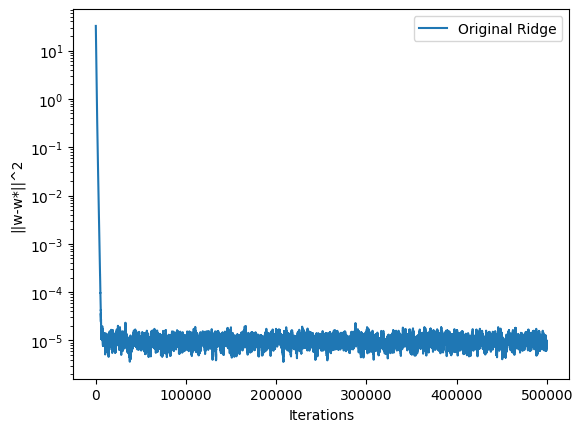

In [27]:
plt.figure()
plt.semilogy(range(N_iteration), loss_ridge, label = 'Original Ridge')
plt.axis('tight')
plt.xlabel("Iterations")
plt.ylabel("||w-w*||^2")
plt.legend()
plt.show()

#### Run SGD on original regression (but with no noise in $y$, i.e., $\sigma=0.0$)

In [28]:
w_init = (np.random.randn(d, 1)) * 0.0
loss_ridge_clean = []
w = w_init.copy()
for i in range(N_iteration):
    random_index = np.random.choice(N, batch_size)
    X_i = X_train[random_index, :]
    y_i = y_train_clean[random_index]
    w = SGD_update(X_i, y_i, w, eta)
    loss_ridge_clean.append(compute_diff_norm(w, w_star_clean))

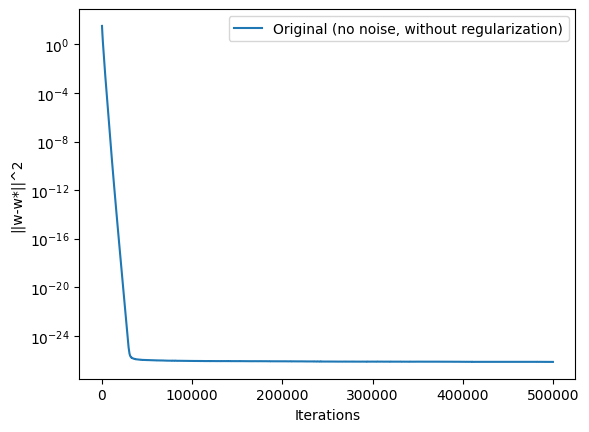

In [29]:
plt.figure()
plt.semilogy(range(N_iteration), loss_ridge_clean, label = 'Original (no noise, without regularization)')
plt.axis('tight')
plt.xlabel("Iterations")
plt.ylabel("||w-w*||^2")
plt.legend()
plt.show()

#### Run SGD on augmented regression

In [30]:
w_aug_init = (np.random.randn(d + N, 1)) * 0.0

loss_aug = []
w_aug = w_aug_init.copy()
for i in range(N_iteration):
    random_index = np.random.choice(N, batch_size)
    X_i = X_train_aug[random_index, :]
    y_i = y_train[random_index]
    w_aug = SGD_update(X_i, y_i, w_aug, eta)
    loss_aug.append(compute_diff_norm(w_aug[:d], w_star))

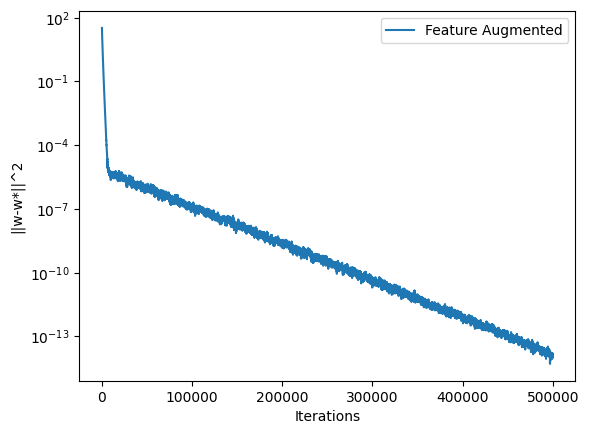

In [31]:
plt.figure()
plt.semilogy(range(N_iteration), loss_aug, label = 'Feature Augmented')
plt.axis('tight')
plt.xlabel("Iterations")
plt.ylabel("||w-w*||^2")
plt.legend()
plt.show()

#### Compare the above three figures

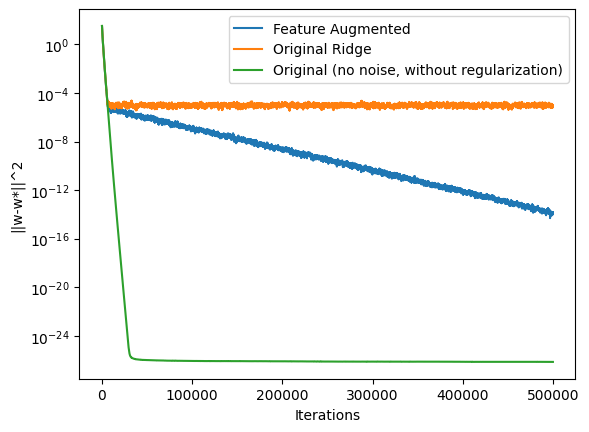

In [32]:
plt.figure()
plt.semilogy(range(N_iteration), loss_aug, label = 'Feature Augmented')
plt.semilogy(range(N_iteration), loss_ridge, label = 'Original Ridge')
plt.semilogy(range(N_iteration), loss_ridge_clean, label = 'Original (no noise, without regularization)')
plt.axis('tight')
plt.xlabel("Iterations")
plt.ylabel("||w-w*||^2")
plt.legend()
plt.show()

#### Zoom in Visualization

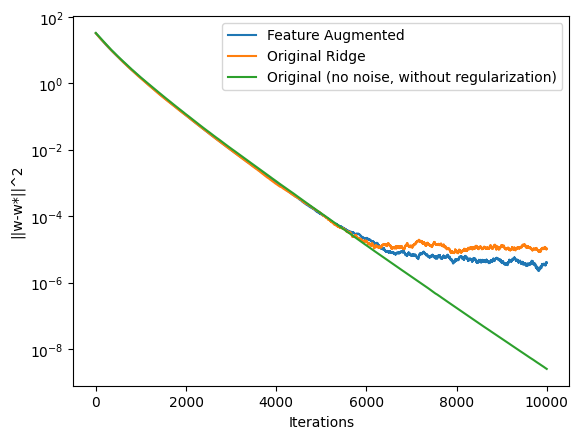

In [33]:
plt.figure()
plt.semilogy(range(N_iteration)[:10000], loss_aug[:10000], label = 'Feature Augmented')
plt.semilogy(range(N_iteration)[:10000], loss_ridge[:10000], label = 'Original Ridge')
plt.semilogy(range(N_iteration)[:10000], loss_ridge_clean[:10000], label = 'Original (no noise, without regularization)')
plt.axis('tight')
plt.xlabel("Iterations")
plt.ylabel("||w-w*||^2")
plt.legend()
plt.show()